In [149]:
#Hermawan - NEVTIK Programming Division
from selenium import webdriver
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
class CoronaDisease:
    def __init__(self):
        self.driver = webdriver.Firefox()

In [151]:
bot = CoronaDisease()
bot.driver.get('https://www.worldometers.info/coronavirus/')

table = bot.driver.find_element_by_xpath('//*[@id="main_table_countries"]/tbody[1]')
list_counter = table.text.split("\n")

In [152]:
def selector(list_name,column):
    for row_index in range(1,len(list_counter)+1):
        eval("list_name.append(table.find_element_by_xpath('tr[{}]/td[{}]'.format(row_index,column)).text)")

In [153]:
country_list, new_cases,total_cases,total_deaths,new_deaths,total_recovered,active_cases = [],[],[],[],[],[],[]

selector(country_list,1)
selector(total_cases,2)
selector(new_cases,3)
selector(total_deaths,4)
selector(new_deaths,5)
selector(total_recovered,6)
selector(active_cases,7)

detail = {'country':country_list,
          'total_cases':total_cases,
          'new_cases':new_cases,
          'total_deaths':total_deaths,
          'new_deaths':new_deaths,
          'total_recovered':total_recovered,
          'active_cases':active_cases}

for i in range(len(total_deaths)):
    if total_deaths[i]=='':
        total_deaths[i]= '0'
        
cases_n_death = {'Negara':country_list,
          'Kasus':[int(i.replace(',','')) for i in total_cases],
          'Kematian':[int(i.replace(',','')) for i in total_deaths]}

In [154]:
corona_table = pd.DataFrame(cases_n_death)
corona_table[:36]

,Negara,Kasus,Kematian
0,China,80849,3199
1,Italy,21157,1441
2,Iran,13938,724
3,S. Korea,8162,75
4,Spain,7753,291
5,Germany,5426,11
6,France,4499,91
7,USA,3083,60
8,Switzerland,2217,14
9,Norway,1205,3


In [155]:
corona_table2 = pd.DataFrame(detail)
corona_table2[:50]

,country,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases
0,China,"80,849",+25,"3,199",+10,"66,931","10,719"
1,Italy,"21,157",,"1,441",,"1,966","17,750"
2,Iran,"13,938","+1,209",724,+113,"4,590","8,624"
3,S. Korea,"8,162",+76,75,+3,834,"7,253"
4,Spain,"7,753","+1,362",291,+95,517,"6,945"
5,Germany,"5,426",+827,11,+2,46,"5,369"
6,France,"4,499",+30,91,,12,"4,396"
7,USA,"3,083",+140,60,+3,56,"2,967"
8,Switzerland,"2,217",+842,14,+1,4,"2,199"
9,Norway,"1,205",+96,3,,1,"1,201"


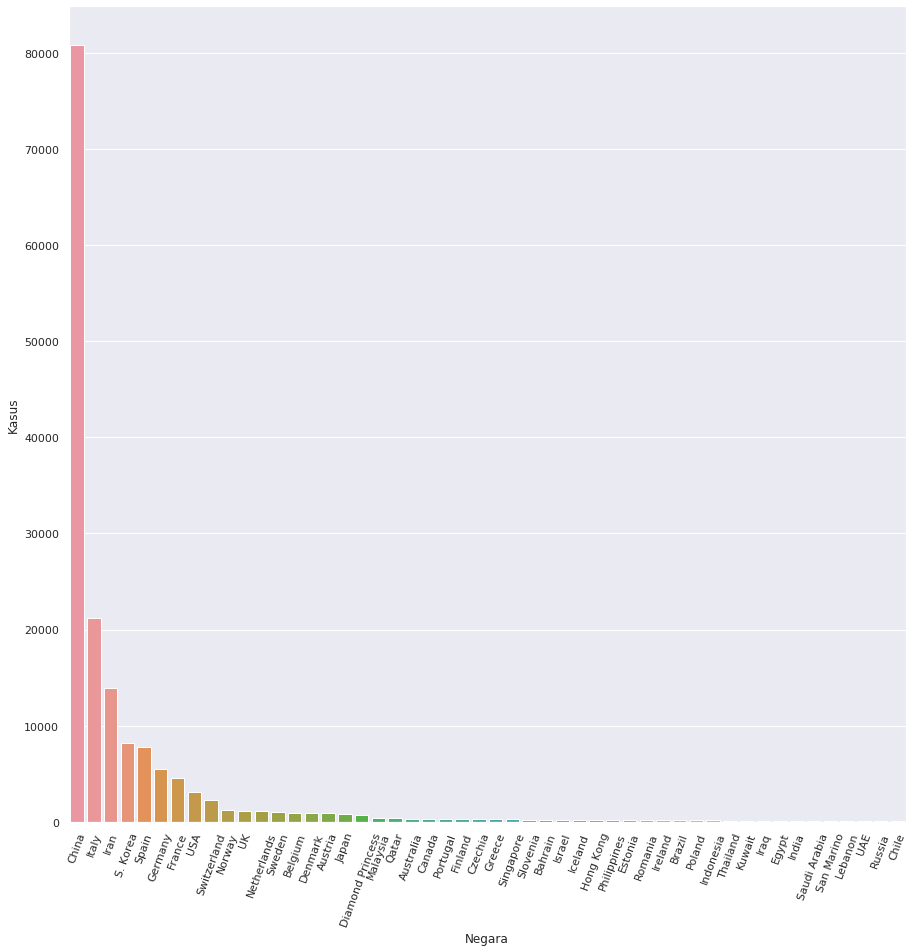

In [156]:
sns.set(rc={'figure.figsize':(15,15)})
bar_chart = sns.barplot(x='Negara', y='Kasus', data=corona_table[:50])
bar_chart.tick_params(axis='x', labelrotation=70)

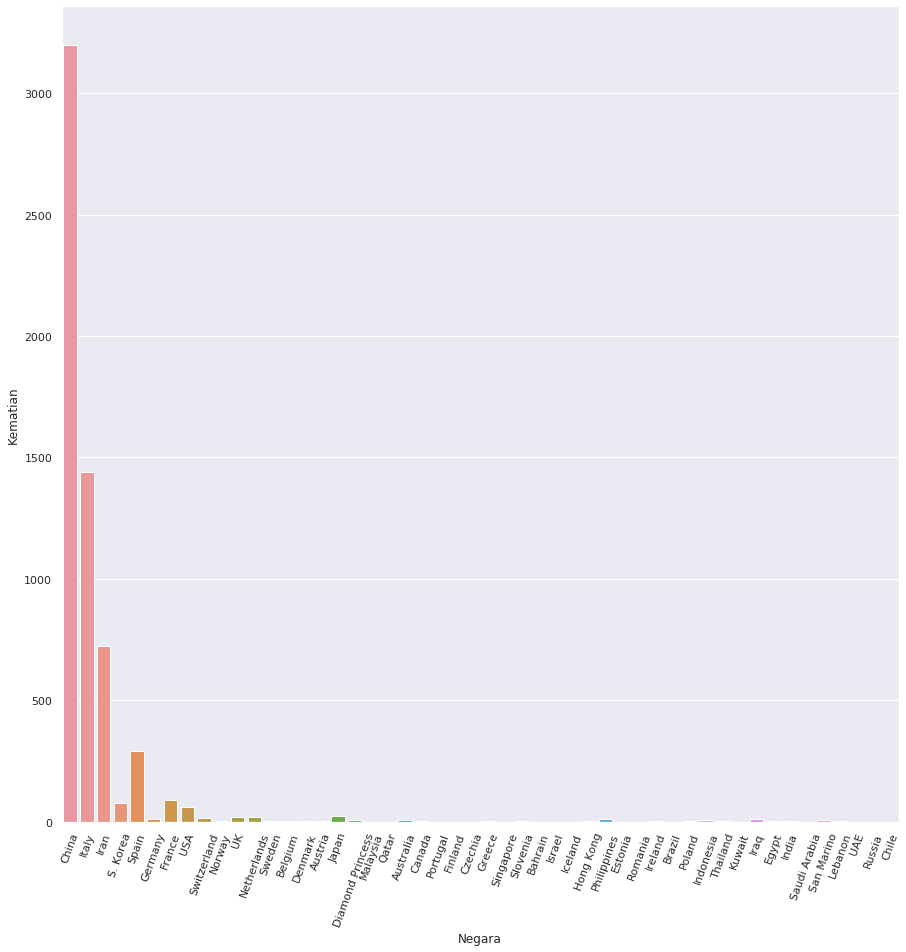

In [157]:
sns.set(rc={'figure.figsize':(15,15)})
bar_chart = sns.barplot(x='Negara', y='Kematian', data=corona_table[:50])
bar_chart.tick_params(axis='x', labelrotation=70)

# Hermawan - NEVTIK Programming Division
March 15th 2020